# Portfolio optimization using unsupervised learning

In [1]:
#Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [3]:
#Loading data
dataset = read_csv('SharePrice.csv', index_col = 0)
dataset.describe()

,GOLDBLN,FRTBS4W(RI),FRTCM10(RI),JPBRYLD(RI),BDBRYLD(RI),BMUK10Y(RI)$,LHCCORP(IN),MLAHYBD(RI),MLHYBAM(RI),MLHYBBA(RI),S&PCOMP(RI),JAPDOWA(RI)$,TOTMKEM(RI),TOTMKUK(RI)$,ENEGYWD(RI),TOTMKEK(RI),JPMPTOT(RI)
count,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000,7575.000000
mean,956.164858,110.561463,401.468058,222.740259,460.885917,895.452137,1875.356024,1113.072712,607.512434,692.378269,3238.231706,209.022822,5660.314511,47340.599489,7051.872914,301.126285,487.908576
std,569.099424,16.676471,147.135368,48.517947,174.213805,328.559044,839.508678,600.031559,299.696867,379.640986,2450.083820,89.826098,2779.842808,19015.800855,3601.258809,175.695516,265.973718
min,252.850000,69.810000,143.080000,137.260000,172.790000,284.960000,572.960000,321.070000,190.440000,189.030000,575.520000,77.990000,1371.610000,13218.850000,1337.180000,57.200000,62.120000
25%,381.925000,101.490000,268.700000,185.585000,259.240000,539.690000,1116.245000,520.790000,305.605000,344.360000,1622.940000,145.775000,3274.725000,30646.555000,2788.545000,104.605000,209.920000
50%,957.200000,120.100000,409.040000,213.730000,500.720000,933.400000,1635.040000,866.260000,511.290000,519.430000,2088.190000,179.540000,5401.880000,48216.750000,8167.360000,348.420000,443.360000
75%,1357.085000,120.755000,527.885000,261.530000,625.805000,1204.875000,2645.110000,1637.800000,866.040000,1029.105000,4123.170000,249.020000,7499.305000,63386.980000,10090.885000,431.045000,708.845000
max,2078.950000,136.250000,681.810000,335.880000,743.180000,1453.510000,3475.820000,2270.330000,1182.960000,1429.780000,10363.350000,476.320000,12263.140000,84785.350000,13556.890000,644.890000,954.170000


<Axes: title={'center': 'Summary of assets'}>

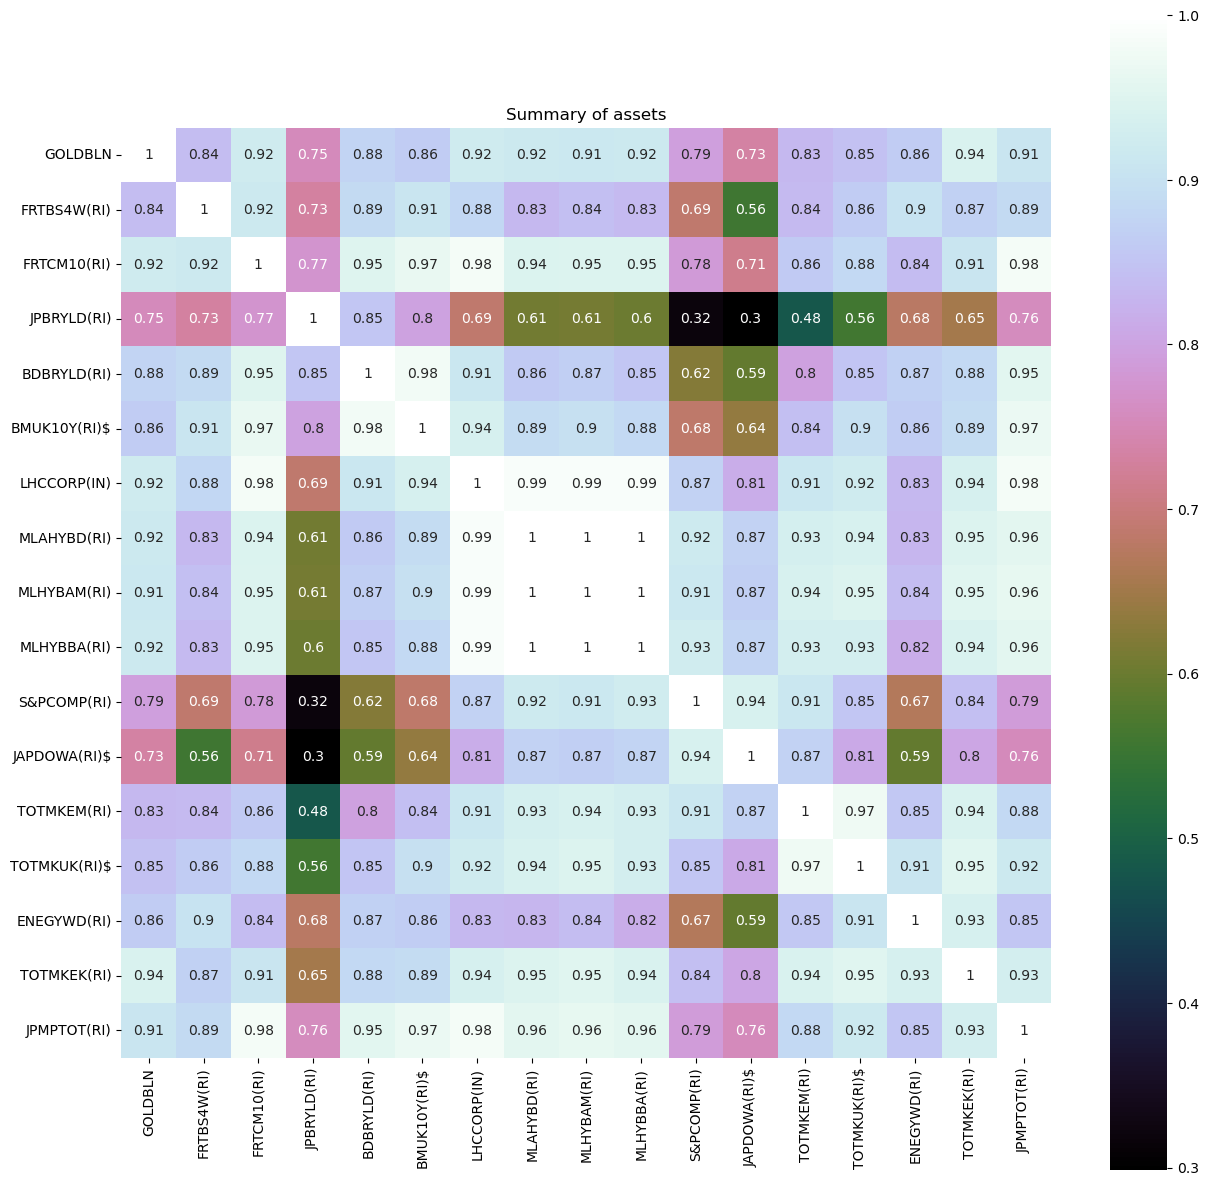

In [4]:
#Correlation analysis
correaltion = dataset.corr()
plt.figure(figsize = (15, 15))
plt.title('Summary of assets')
sns.heatmap(correaltion, vmax=1, square=True, annot=True, cmap='cubehelix')


In [5]:
#Checking for missing values and filling them
missing_fractions = dataset.isnull().mean().sort_values(ascending = False)
missing_fractions.head(10)
drop_list = sorted(list(missing_fractions[missing_fractions>0.3].index))
dataset.drop(labels=drop_list, axis=1, inplace = True)
dataset.shape

(7575, 17)

In [6]:
dataset=dataset.fillna(method='ffill')

In [7]:
# Daily Log Returns (%)
# datareturns = np.log(data / data.shift(1)) 

# Daily Linear Returns (%)
datareturns = dataset.pct_change(1)

#Remove Outliers beyong 3 standard deviation
datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns), columns = datareturns.columns, index = datareturns.index)

In [8]:
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how = 'any', inplace=True)
dataset.shape

(7575, 17)

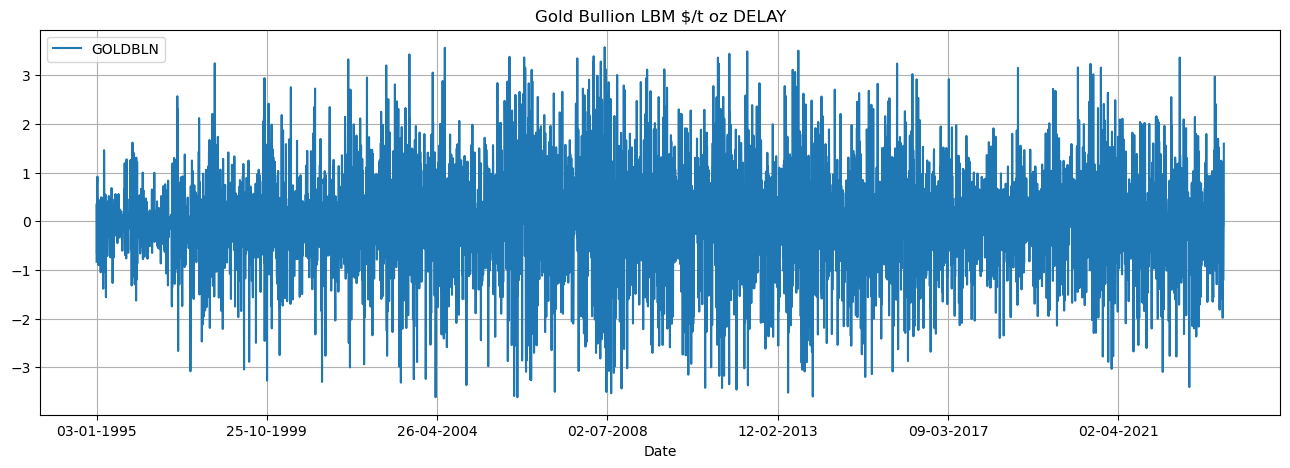

In [9]:
#Sample Returns of one of the security
plt.figure(figsize = (16, 5))
plt.title("Gold Bullion LBM $/t oz DELAY")
rescaledDataset.GOLDBLN.plot()
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# Dividing the dataset into training and testing sets
percentage = int(len(rescaledDataset) * 0.8)
X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]

X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)

In [11]:
#Principle component analysis
pca = PCA()
PrincipleComponent = pca.fit(X_train)

,Explained Variance
0,25.86%
1,42.89%
2,55.13%
3,62.11%
4,68.33%
5,74.22%
6,79.17%
7,83.75%
8,87.82%
9,90.92%


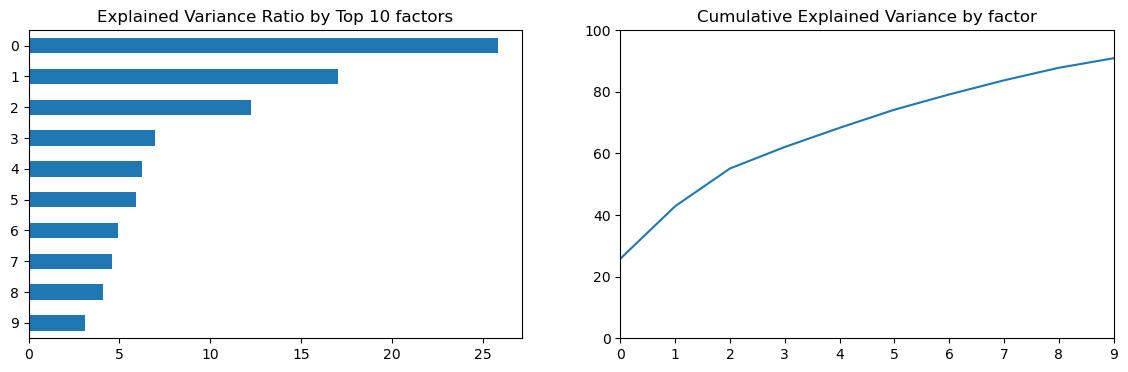

In [12]:
NumEigenvalues=10
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 10 factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by factor');
# explained_variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

In [13]:
#Weighing
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>],
       [<Axes: title={'center': 'Portfolio 4'}>]], dtype=object)

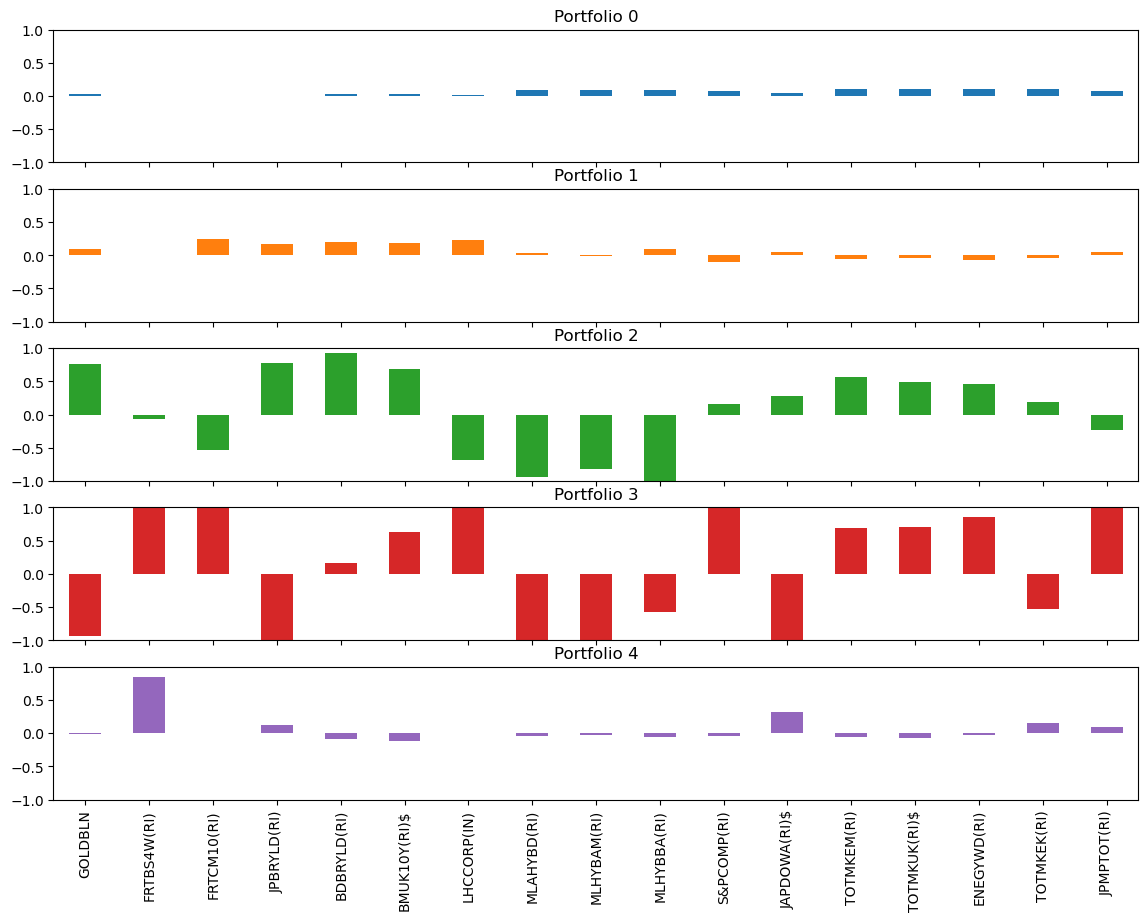

In [14]:
NumComponents=5
        
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=dataset.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis=0)
eigen_portfolios.index = [f'Portfolio {i}' for i in range( NumComponents)]
np.sqrt(pca.explained_variance_)
eigen_portfolios.T.plot.bar(subplots=True, layout=(int(NumComponents),1), figsize=(14,10), legend=False, sharey=True, ylim= (-1,1))

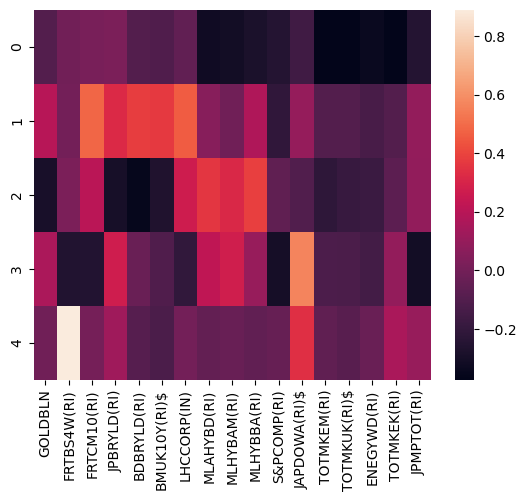

In [15]:
# plotting heatmap 
sns.heatmap(topPortfolios);

In [16]:
# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

Eigen portfolio #0 with the highest Sharpe. Return 8.52%, vol = 4.13%, Sharpe = 2.06
      Return       Vol    Sharpe
0   0.085217  0.041340  2.061365
13  0.654130  0.444702  1.470940
1   0.055117  0.063201  0.872095
7   0.220180  0.321583  0.684675
8   0.083008  0.171373  0.484370
4   0.074665  0.168335  0.443551
9   0.150194  0.384376  0.390747
6   0.173134  0.698048  0.248027
3   0.037015  0.628665  0.058879
10 -0.119655  1.389738 -0.086099
16 -0.999996  4.698652 -0.212826
2  -0.079360  0.336544 -0.235808
14 -1.000000  4.193874 -0.238443
5  -0.580560  1.469475 -0.395080
11 -0.279775  0.660828 -0.423371
12 -0.612458  1.155999 -0.529808
15 -0.519479  0.721870 -0.719629


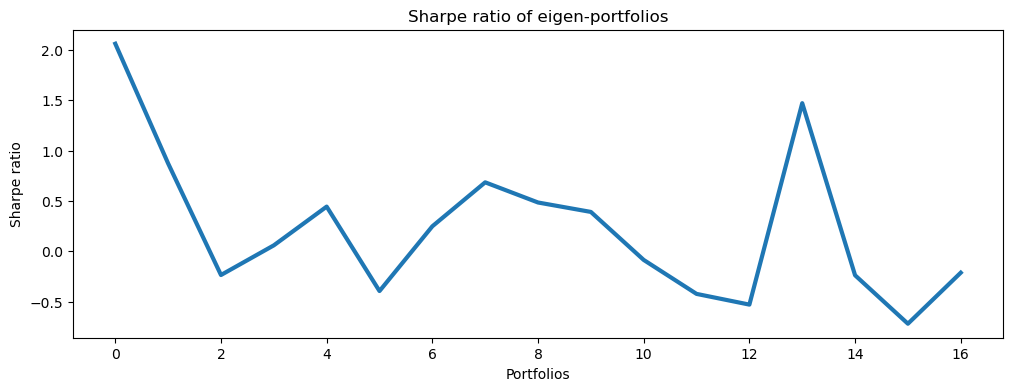

In [17]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

Sum of weights of current eigen-portfolio: 100.00


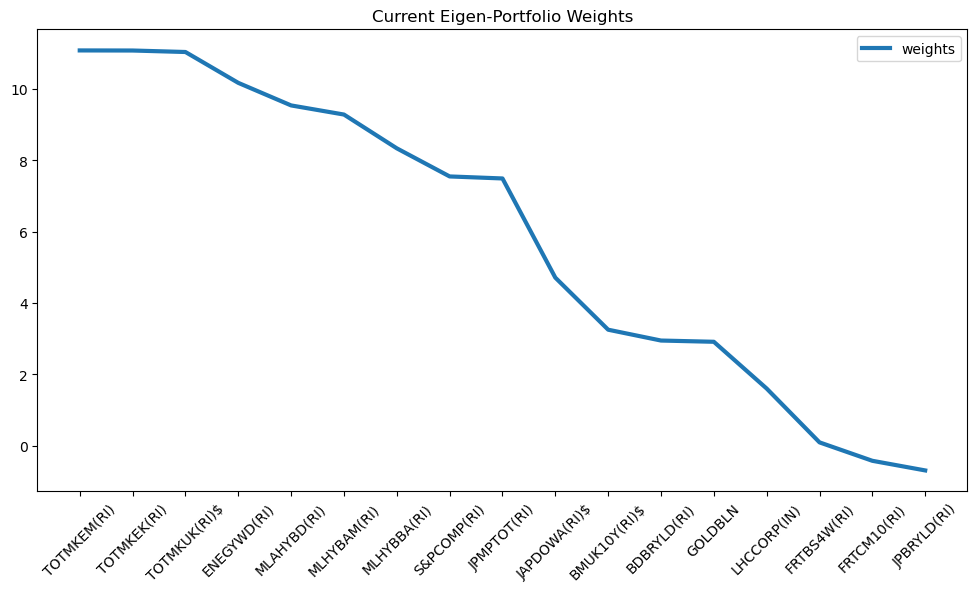

,weights
TOTMKEM(RI),11.082609
TOTMKEK(RI),11.080141
TOTMKUK(RI)$,11.038540
ENEGYWD(RI),10.173434
MLAHYBD(RI),9.540952
MLHYBAM(RI),9.285272
MLHYBBA(RI),8.338279
S&PCOMP(RI),7.550202
JPMPTOT(RI),7.493486
JAPDOWA(RI)$,4.713242


In [18]:
weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'weights': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['weights'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
plotEigen(weights=weights[0], plot=True)

Backtest result for eigen=weights[0]
Current Eigen-Portfolio:
Return = 3.78%
Volatility = 4.66%
Sharpe = 0.81


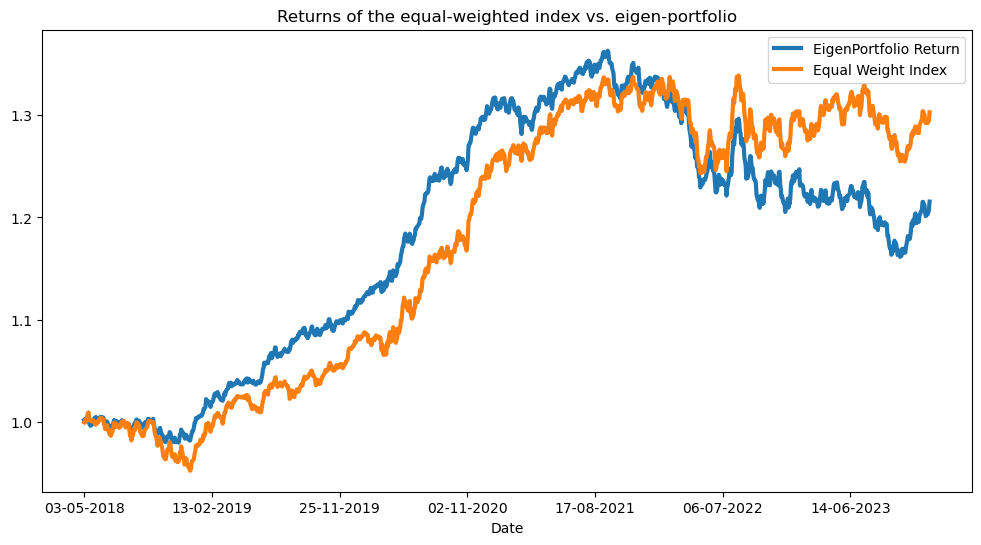

Backtest result for eigen=weights[1]
Current Eigen-Portfolio:
Return = -0.72%
Volatility = 6.35%
Sharpe = -0.11


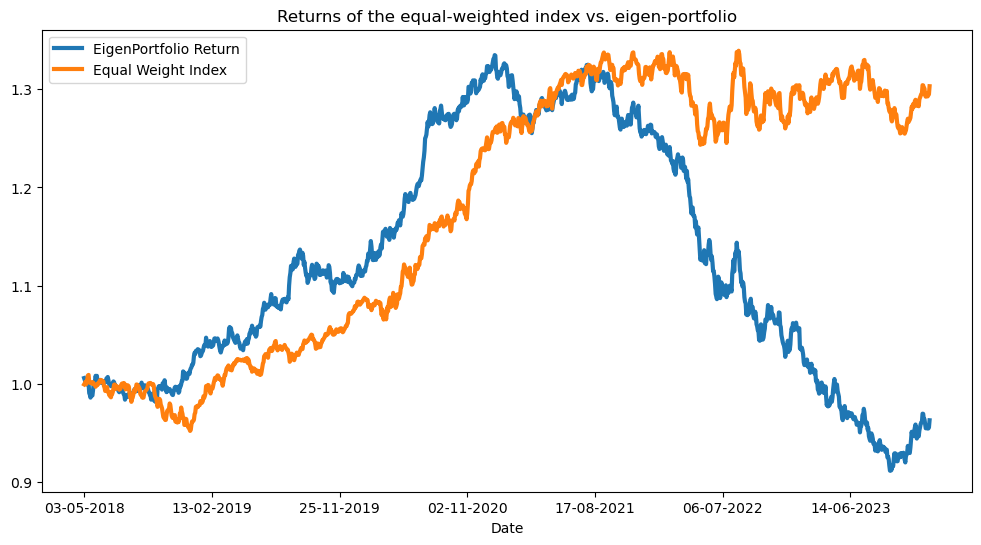

Backtest result for eigen=weights[2]
Current Eigen-Portfolio:
Return = -27.00%
Volatility = 31.15%
Sharpe = -0.87


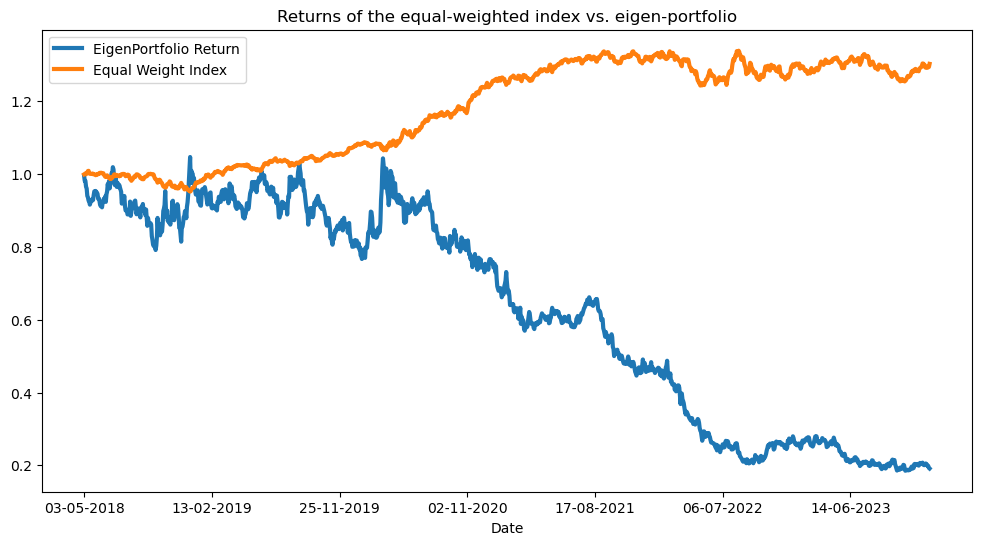

Backtest result for eigen=weights[3]
Current Eigen-Portfolio:
Return = 41.16%
Volatility = 54.41%
Sharpe = 0.76


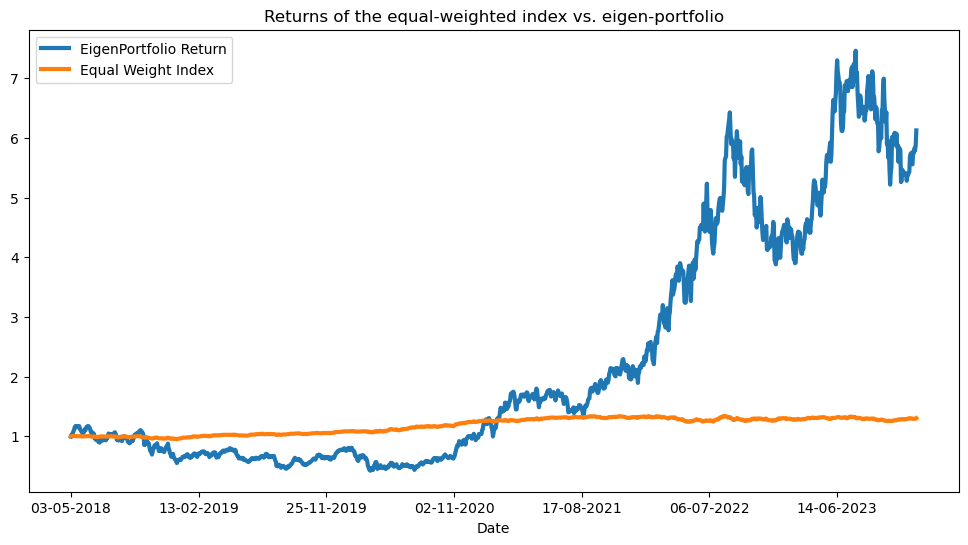

Backtest result for eigen=weights[4]
Current Eigen-Portfolio:
Return = 2.48%
Volatility = 14.60%
Sharpe = 0.17


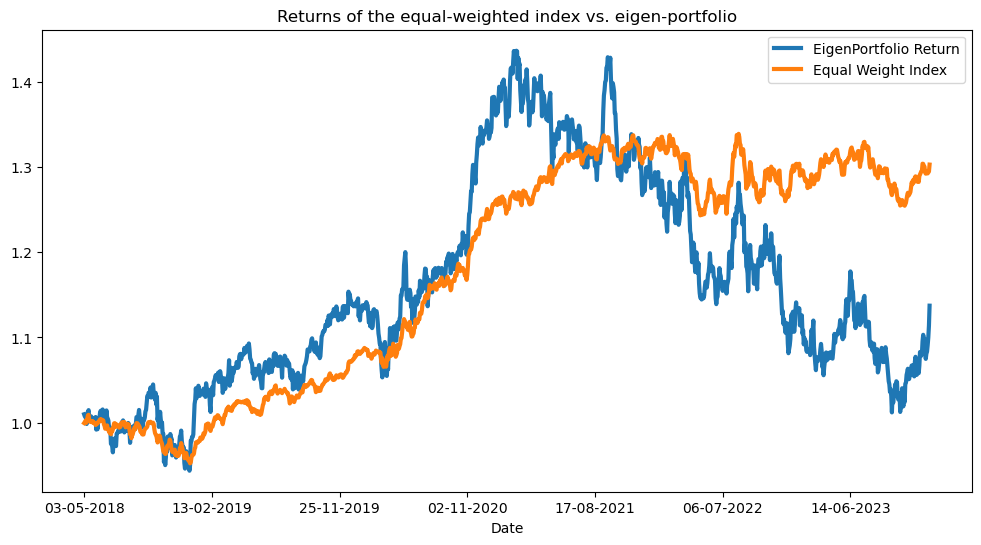

Backtest result for eigen=weights[5]
Current Eigen-Portfolio:
Return = -71.73%
Volatility = 131.62%
Sharpe = -0.54


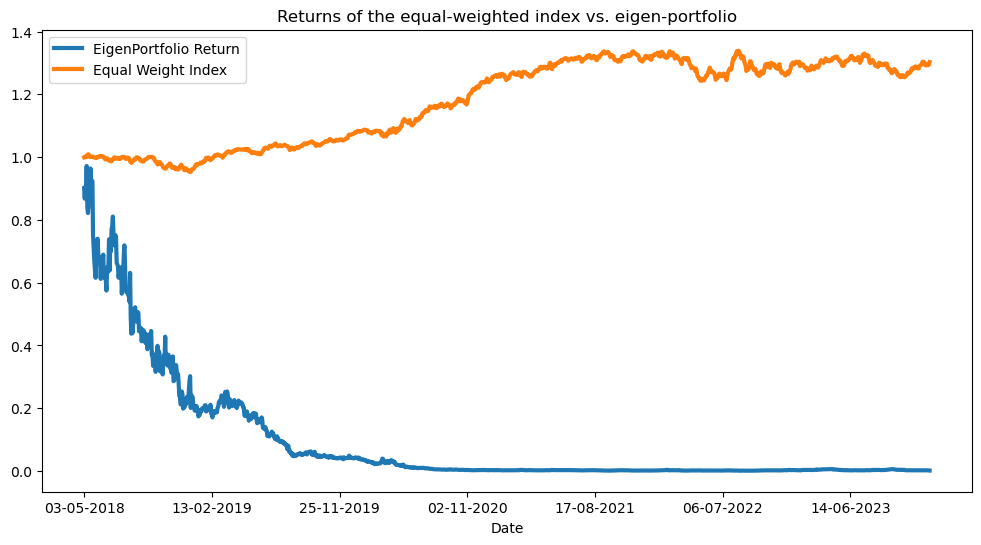

Backtest result for eigen=weights[6]
Current Eigen-Portfolio:
Return = 98.69%
Volatility = 60.10%
Sharpe = 1.64


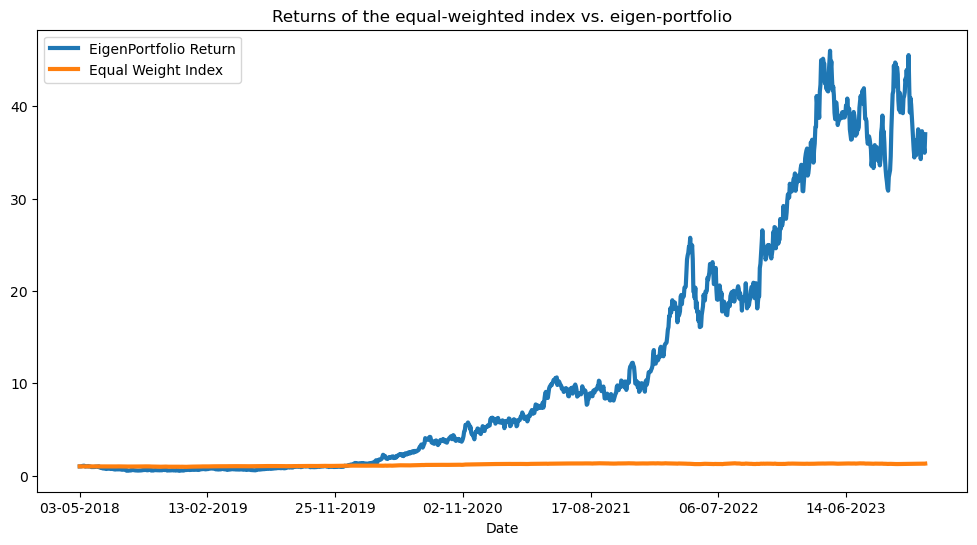

Backtest result for eigen=weights[7]
Current Eigen-Portfolio:
Return = 30.45%
Volatility = 27.44%
Sharpe = 1.11


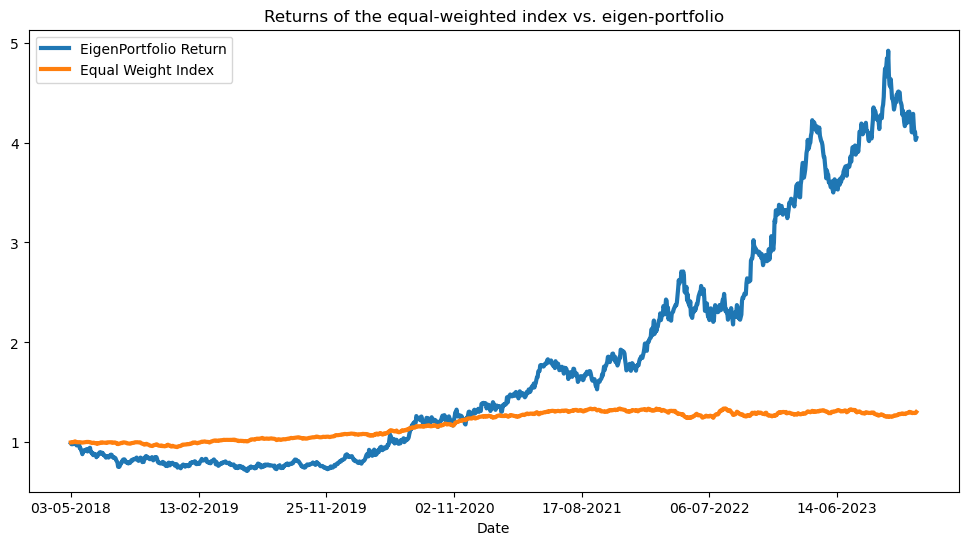

Backtest result for eigen=weights[8]
Current Eigen-Portfolio:
Return = 3.47%
Volatility = 16.79%
Sharpe = 0.21


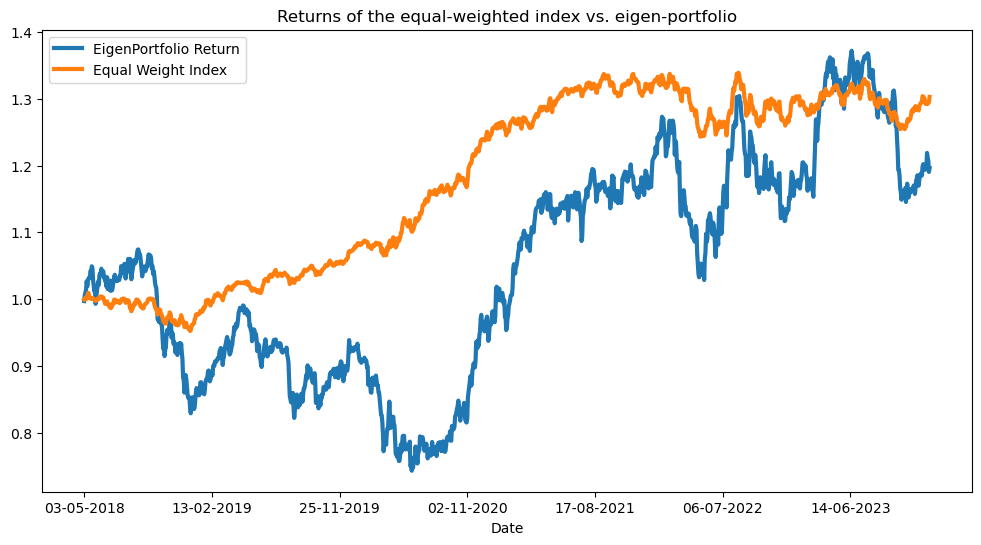

Backtest result for eigen=weights[9]
Current Eigen-Portfolio:
Return = 19.69%
Volatility = 29.29%
Sharpe = 0.67


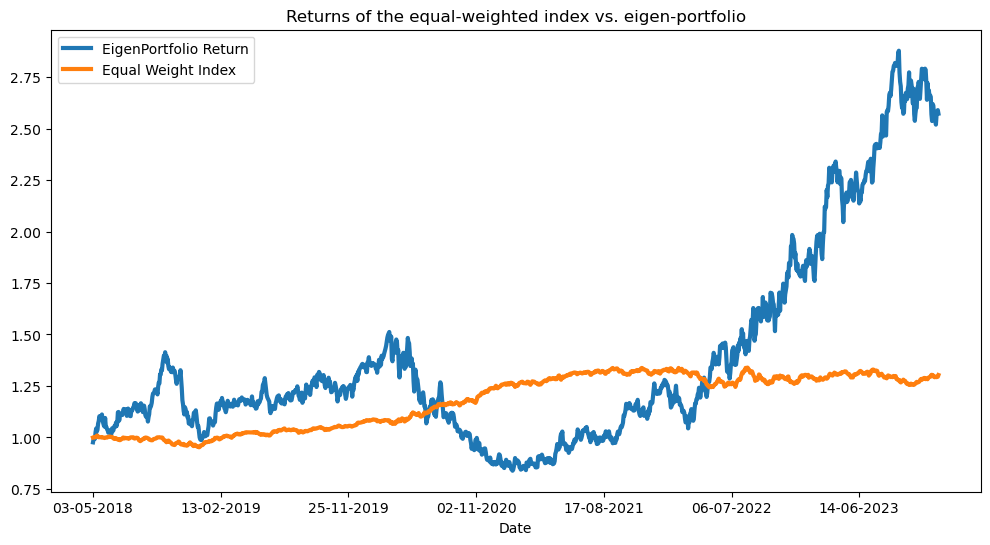

Backtest result for eigen=weights[10]
Current Eigen-Portfolio:
Return = 71.45%
Volatility = 132.47%
Sharpe = 0.54


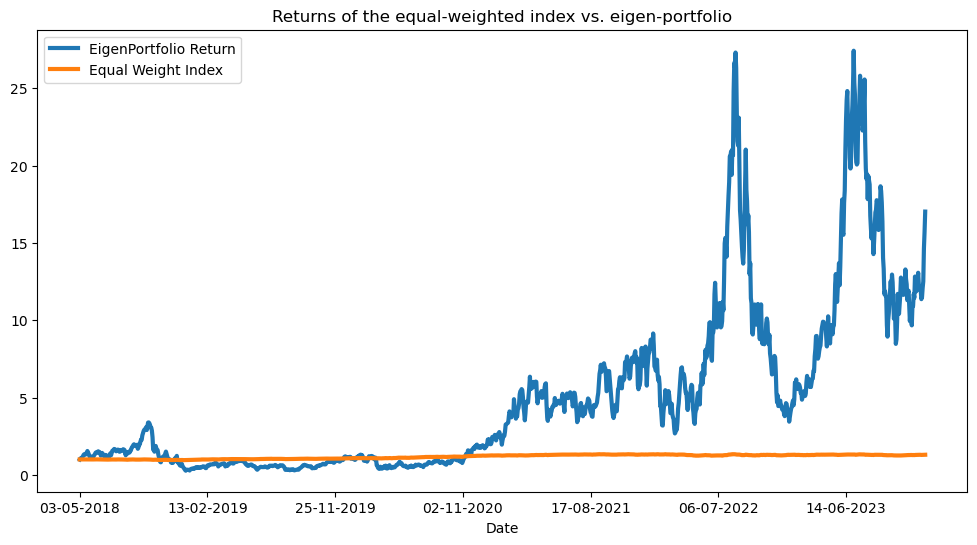

Backtest result for eigen=weights[11]
Current Eigen-Portfolio:
Return = -29.42%
Volatility = 61.51%
Sharpe = -0.48


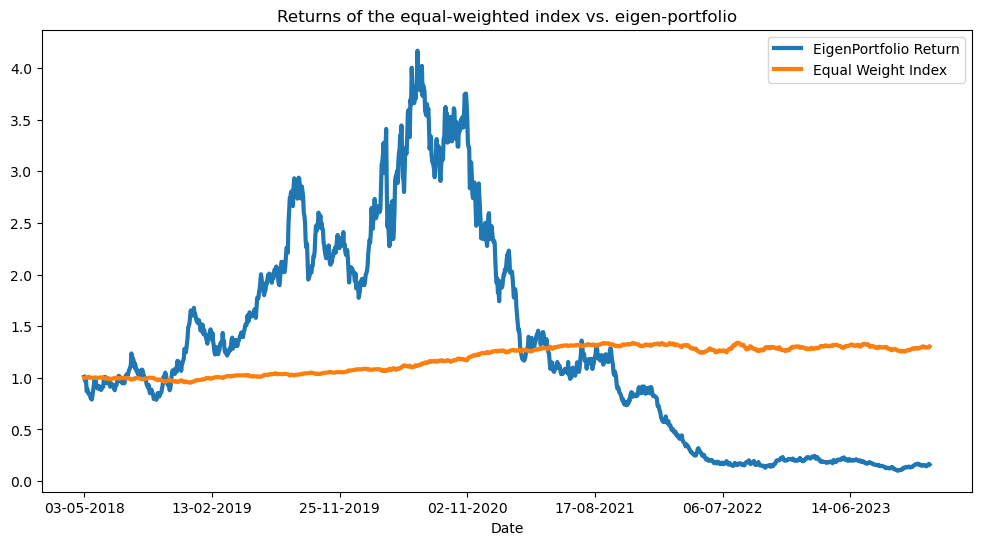

Backtest result for eigen=weights[12]
Current Eigen-Portfolio:
Return = -68.12%
Volatility = 100.42%
Sharpe = -0.68


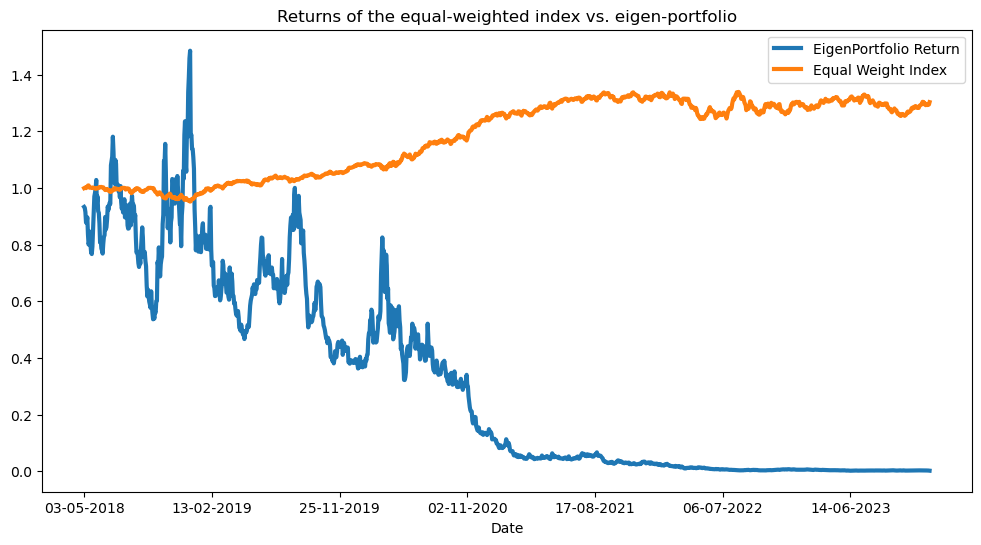

Backtest result for eigen=weights[13]
Current Eigen-Portfolio:
Return = 23.78%
Volatility = 43.90%
Sharpe = 0.54


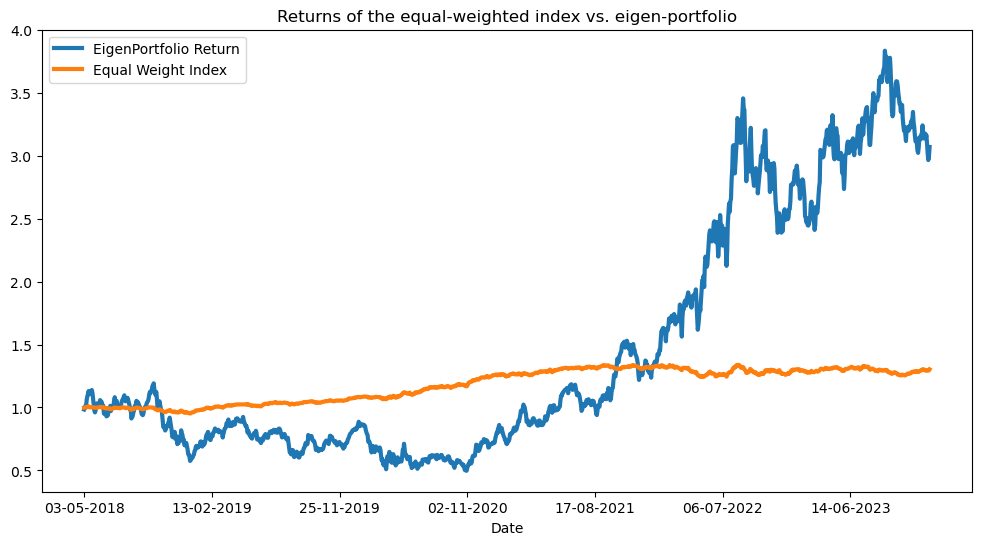

Backtest result for eigen=weights[14]
Current Eigen-Portfolio:
Return = -99.99%
Volatility = 324.72%
Sharpe = -0.31


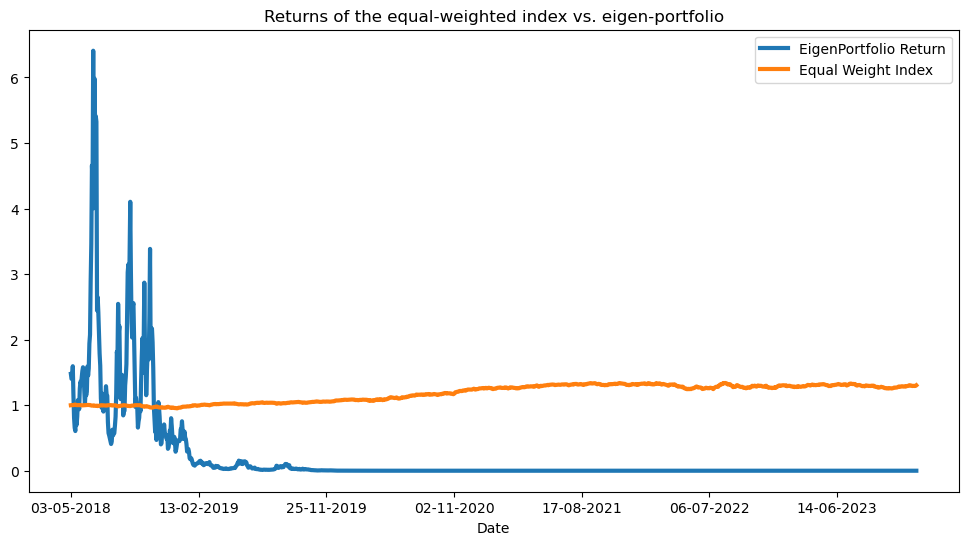

In [19]:
def Backtest(eigen):
    '''
    Plots Principal Components returns against real returns.
    '''
    eigen_prtfi = pd.DataFrame(data={'weights': eigen.squeeze()}, index=stock_tickers)
    eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)    

    eigen_prti_returns = np.dot(X_test_raw.loc[:, eigen_prtfi.index], eigen)
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_test_raw.index)
    
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)  
    print('Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (returns*100, vol*100, sharpe))
    
    equal_weight_return = (X_test_raw * (1 / len(pca.components_))).sum(axis=1)    
    df_plot = pd.DataFrame({
        'EigenPortfolio Return': eigen_portfolio_returns, 
        'Equal Weight Index': equal_weight_return
    }, index=X_test.index)
    
   
    np.cumprod(df_plot + 1).plot(
        title='Returns of the equal-weighted index vs. eigen-portfolio', 
        figsize=(12, 6), 
        linewidth=3
    )
    plt.show()


for i in range(15): 
    print(f"Backtest result for eigen=weights[{i}]")  
    result = Backtest(eigen=weights[i])

